In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import pearsonr

In [4]:
df = pd.read_csv('Customer Purchase and Churn Analysis.csv')

In [7]:
df.shape

(10000, 15)

In [9]:
df.isnull().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
# Data Preprocessing
print('Initial Data Overview:')
print(df.info())
print(df.describe())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-nul

In [15]:
# Convert date columns to datetime
df['Launch_Date'] = pd.to_datetime(df['Launch_Date'], format='%d-%m-%Y')
df['Peak_Sales_Date'] = pd.to_datetime(df['Peak_Sales_Date'], format='%d-%m-%Y')

In [17]:
df

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy,Customer_Segment
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program,2
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount,1
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program,0
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount,1
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,2022-03-04,2023-02-10,Winter,Evening,Loyalty Program,2
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,2021-08-21,2023-02-06,Spring,Morning,Loyalty Program,1
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,2020-09-13,2023-05-05,Spring,Evening,Discount,0
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,2020-01-26,2023-08-03,Summer,Morning,Discount,2


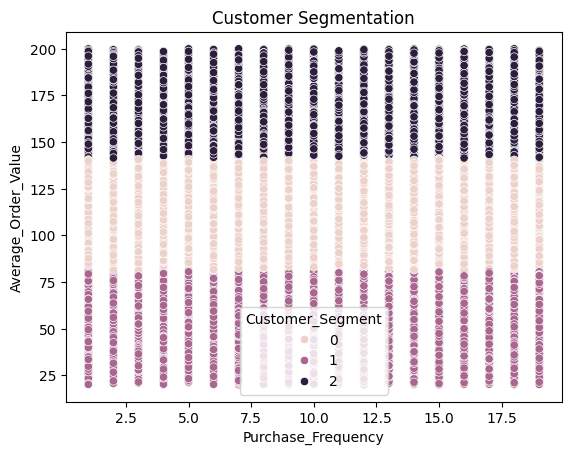

In [16]:
# 1. Customer Segmentation using K-means
segmentation_features = ['Purchase_Frequency', 'Average_Order_Value', 'Churn_Probability']
kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(df[segmentation_features])
sns.scatterplot(data=df, x='Purchase_Frequency', y='Average_Order_Value', hue='Customer_Segment')
plt.title('Customer Segmentation')
plt.show()

In [20]:
# Binarize the Churn_Probability column (1 if > 0.5, else 0)
df['Churn_Label'] = np.where(df['Churn_Probability'] > 0.5, 1, 0)

# Verify the transformation
print(df['Churn_Label'].value_counts())

Churn_Label
0    5069
1    4931
Name: count, dtype: int64


In [23]:
# 2. Churn Prediction Analysis
X = df[['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases']]
y = df['Churn_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Churn Prediction Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Churn Prediction Accuracy: 0.5026666666666667
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1563
           1       0.48      0.47      0.48      1437

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [24]:
# 3. Lifetime Value Prediction using Correlation
correlation, _ = pearsonr(df['Purchase_Frequency'], df['Lifetime_Value'])
print(f'Correlation between Purchase Frequency and Lifetime Value: {correlation:.2f}')

Correlation between Purchase Frequency and Lifetime Value: 0.01


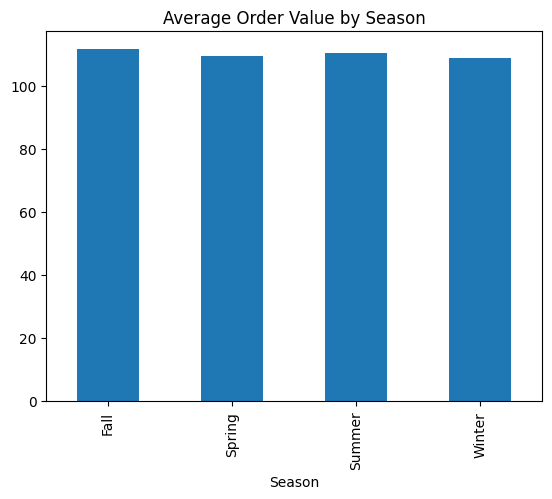

In [27]:
# 4. Seasonal Sales Analysis
season_sales = df.groupby('Season')['Average_Order_Value'].mean()
season_sales.plot(kind='bar', title='Average Order Value by Season')
plt.show()

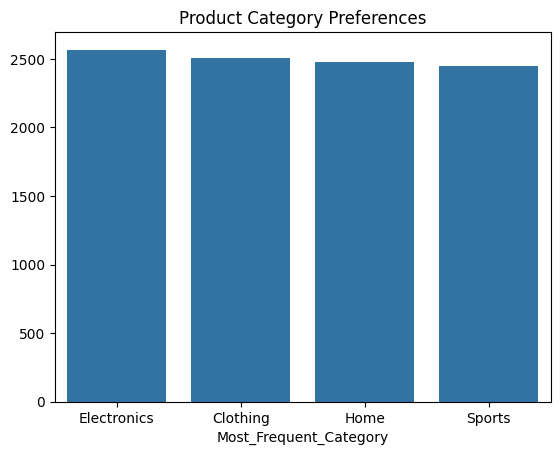

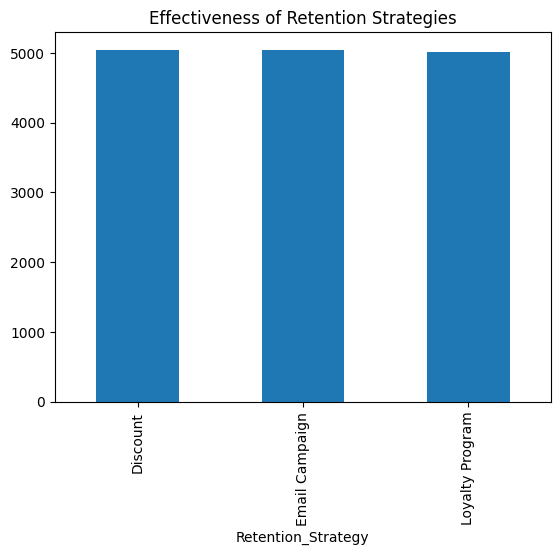

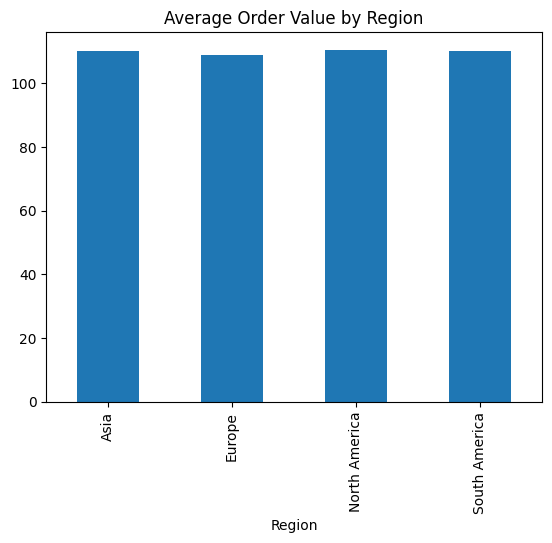

Analysis Completed!


In [28]:
# 5. Product Category Preference
category_count = df['Most_Frequent_Category'].value_counts()
sns.barplot(x=category_count.index, y=category_count.values)
plt.title('Product Category Preferences')
plt.show()

# 6. Retention Strategy Effectiveness
strategy_group = df.groupby('Retention_Strategy')['Lifetime_Value'].mean()
strategy_group.plot(kind='bar', title='Effectiveness of Retention Strategies')
plt.show()

# 7. Regional Analysis
region_avg_order = df.groupby('Region')['Average_Order_Value'].mean()
region_avg_order.plot(kind='bar', title='Average Order Value by Region')
plt.show()

print('Analysis Completed!')


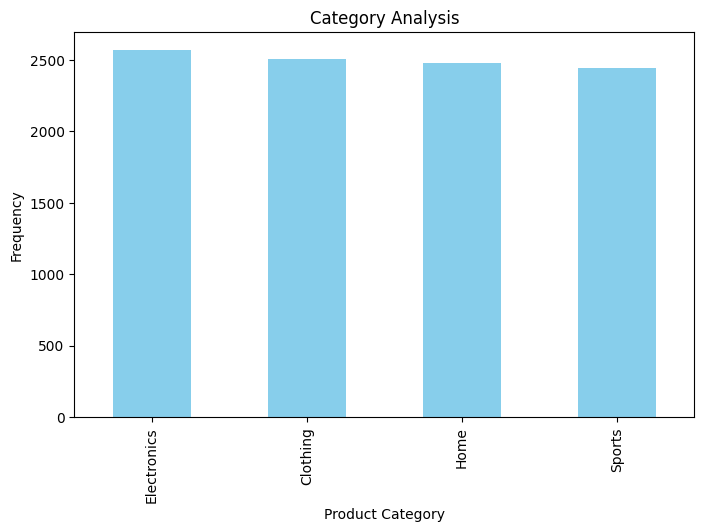

In [29]:
# Bar Chart for Category Analysis
plt.figure(figsize=(8, 5))
category_count.plot(kind='bar', color='skyblue')
plt.title('Category Analysis')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()

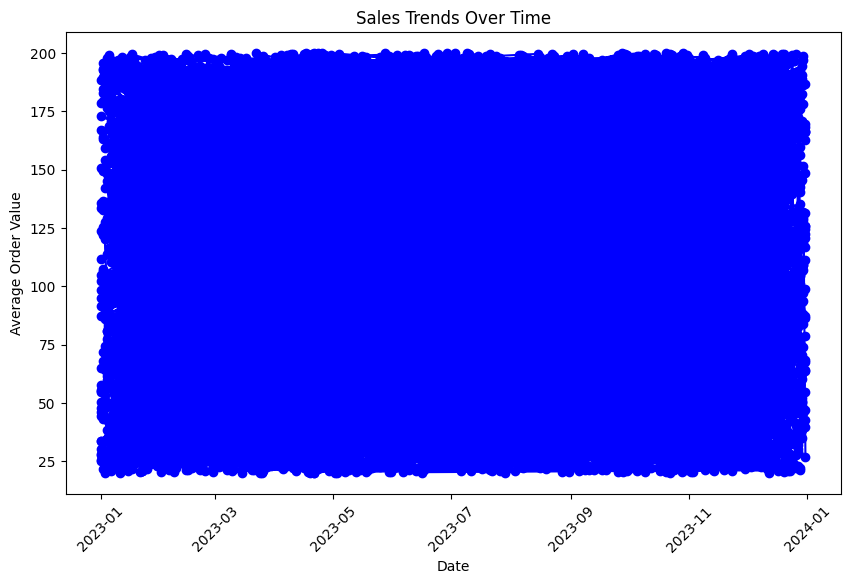

In [30]:
# Line Plot for Sales Trends
plt.figure(figsize=(10, 6))
plt.plot(df['Peak_Sales_Date'], df['Average_Order_Value'], marker='o', linestyle='-', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()

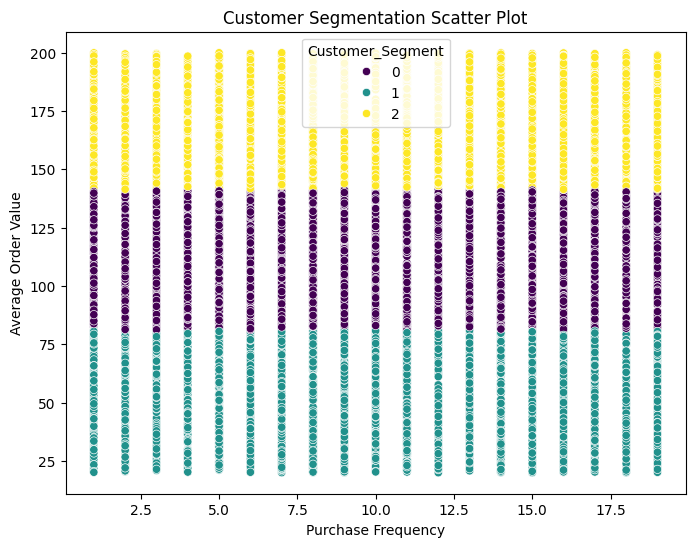

In [31]:
# Scatter Plot for Customer Segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Purchase_Frequency', y='Average_Order_Value', hue='Customer_Segment', palette='viridis')
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.show()